# Week 2 - Linear Regression in Pytorch

In [2]:
# libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Prepare data

(100, 1) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>
torch.Size([100])
Reshape:  torch.Size([100, 1])


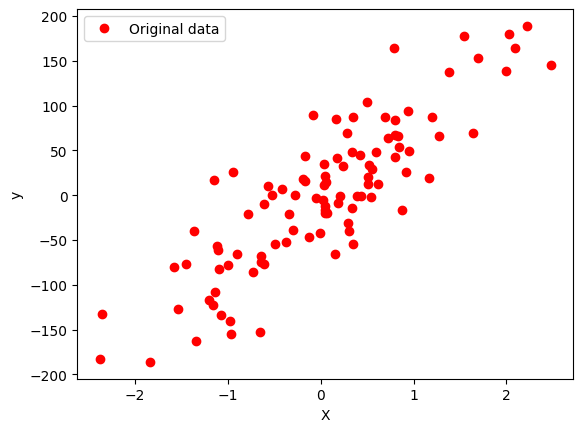

In [7]:
# Generate synthetic regression data using scikit-learn's make_regression function
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=50, random_state=4)

# Convert features (X) and target variable (y) to PyTorch tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

print(X_numpy.shape, type(X_numpy))
print(y_numpy.shape, type(y_numpy))

print(y.shape)

# Reshape the target variable tensor to ensure compatibility woth model training
# Reshaping is necessary because PyTorch expects the target variable to have dimensions (n_samples, n_outputs)
# In this case, since we have only one output, we reashape it to (n_samples, 1)
y = y.view(y.shape[0], 1)
print("Reshape: ", y.shape)

# Plot the original data points (red circles) and the predicted regression line (blue line)
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Model

In [9]:
# Get the number of samples and number of features in the dataset
n_samples, n_features = X.shape

# Define the input size of the model, which is equal to the number of features in the dataset
input_size = n_features

# Define the output size of the model, ehich is 1 for linear regression since we are predicting a single continuous value
output_size = 1

In [10]:
# Define the linear regression model class using PyTorch's nn.Module
# Linear model f = wx + b
class MyModel(nn.Module):
  def __init__(self, n_input_features):
    # Call the constructor of the parent class (nn.Module)
    super(MyModel, self).__init__()

    # Define the linear layer of the model using nn.Linear
    self.linear = nn.Linear(n_input_features, 1)  # parameters: in_features, out_features

  def forward(self, x):
    # Define the forward pass of the model
    # This function takes input data 'x' and computes the predicted output 'y_pred'
    # Perform the linear transformation on the input data using the defined linear layer
    # The linear layer automatically applies the weights (w) and bias (b) to the input data
    # It computes the dot product of input features and weights, and adds the bias term
    y_pred = self.linear(x)

    # Return the predicted output
    return y_pred

# Create an instance of the MyModel class, passing the input_size as the nuber of input number of input features
model = MyModel(input_size)

for param in model.parameters():
  print(param)

Parameter containing:
tensor([[0.8242]], requires_grad=True)
Parameter containing:
tensor([-0.8194], requires_grad=True)


## Loss and optimizer

In [11]:
# Set the learning rate for the optimizer
learning_rate = 0.01

# Define the loss function for the model, which is Mean Squared Error (MSE) Loss
# The criterion will be used to compute the loss between the model predictions and the actual target values
criterion = nn.MSELoss()

# Define the optimizer for updating the model parameters during training
# Stochastic Gradient Descent (SGD) optimizer is used with the specified learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training loop

In [13]:
# Define the nu,ber of epochs for training
num_epochs = 1000

# Loop over the specified number of epochs for training the model
for epoch in range(num_epochs):
  # Forward pass: compute predicted y by passing inpur data (X) through the model
  y_predicted = model(X)

  # Compute the loss using the definied loss function (MSE)
  loss = criterion(y_predicted, y)

  # Backward pass: compute gradient of the loss with respecr to model parameters
  # This calculates the gradients of the loss function w.r.t. the parameters (weights and biases)
  loss.backward()

  # Update model parameters using the optimizer
  # The optimizer adjusts the model parameters based on the computed gradients and the learning rate
  optimizer.step()

  # Zero the gradients for the next iteration to prevent accumulation
  optimizer.zero_grad()

  # Print the loss every 100 epochs
  if (epoch+1) % 10 == 0:
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
      # Accessing parameters
      for param in model.parameters():
        print(param)

# After training, detach the predicted values from the compulational graph and convert them to NumPy array
predicted = model(X).detach().numpy()

epoch: 10, loss = 5349.4370
Parameter containing:
tensor([[13.4635]], requires_grad=True)
Parameter containing:
tensor([-0.4382], requires_grad=True)
epoch: 20, loss = 4224.5986
Parameter containing:
tensor([[23.8991]], requires_grad=True)
Parameter containing:
tensor([-0.2014], requires_grad=True)
epoch: 30, loss = 3457.9309
Parameter containing:
tensor([[32.5159]], requires_grad=True)
Parameter containing:
tensor([-0.0696], requires_grad=True)
epoch: 40, loss = 2935.2710
Parameter containing:
tensor([[39.6312]], requires_grad=True)
Parameter containing:
tensor([-0.0128], requires_grad=True)
epoch: 50, loss = 2578.8843
Parameter containing:
tensor([[45.5069]], requires_grad=True)
Parameter containing:
tensor([-0.0085], requires_grad=True)
epoch: 60, loss = 2335.8228
Parameter containing:
tensor([[50.3592]], requires_grad=True)
Parameter containing:
tensor([-0.0397], requires_grad=True)
epoch: 70, loss = 2170.0171
Parameter containing:
tensor([[54.3667]], requires_grad=True)
Parameter 

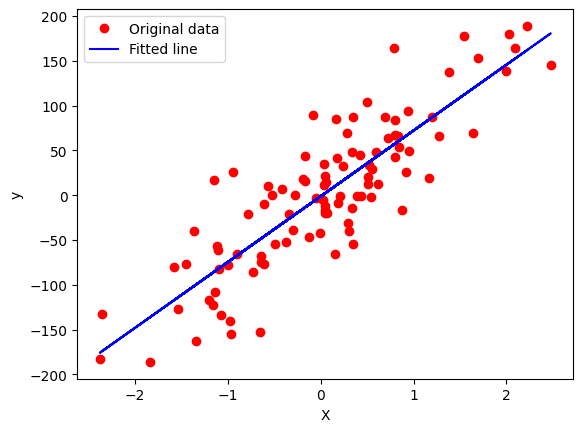

In [14]:
# Plot the original data points (red circles) and the predicted regression line (blue line)
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')
plt.plot(X_numpy, predicted, 'b', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
# Accessing parameters
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[73.4042]], requires_grad=True)
Parameter containing:
tensor([-1.0804], requires_grad=True)


## Testing

In [17]:
model(torch.tensor([1.7]))

tensor([123.7067], grad_fn=<ViewBackward0>)

In [18]:
# Generate some test data points to evaluate the trained model
test_x = np.array([[3], [3.45], [4.20]])

# Convert the test data to PyTorch tensor with the appropriate data type
test_x = torch.from_numpy(test_x.astype(np.float32))

# Get the model predictions for the test data
test_y = model(test_x)

# Detach the test predictions from the computational graph and convert them to NumPy array
test_y = test_y.detach().numpy()

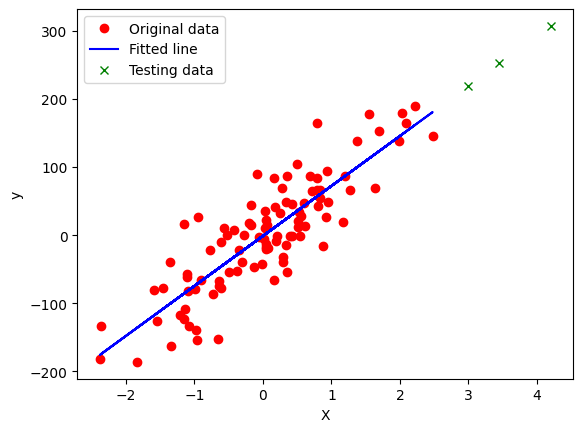

In [19]:
# Plot the original data points (red circles), the predicted regression line (blue line), and additional testing values (green crosses)
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')  # Plot original data points
plt.plot(X_numpy, predicted, 'b', label='Fitted line')  # Plot fitted regression line

# Add the testing data points along woth their predicted values (marked with green crosses)
plt.plot(test_x, test_y, 'gx', label='Testing data')  # Plot testing daat points

# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('y')

# Display legend
plt.legend()

# Show the plot
plt.show()